# EDA

In [1]:
from function import *

---

### 1. Overall information

In [2]:
# load data
train = pd.read_csv('data/coupon_visit_train.csv')

In [3]:
# check shape
print('train shape :', train.shape) 

train shape : (2833180, 8)


In [4]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833180 entries, 0 to 2833179
Data columns (total 8 columns):
PURCHASE_FLG           int64
I_DATE                 object
PAGE_SERIAL            int64
REFERRER_hash          object
VIEW_COUPON_ID_hash    object
USER_ID_hash           object
SESSION_ID_hash        object
PURCHASEID_hash        object
dtypes: int64(2), object(6)
memory usage: 172.9+ MB


In [5]:
# check null
train.isnull().any()

PURCHASE_FLG           False
I_DATE                 False
PAGE_SERIAL            False
REFERRER_hash          False
VIEW_COUPON_ID_hash    False
USER_ID_hash           False
SESSION_ID_hash        False
PURCHASEID_hash         True
dtype: bool

In [6]:
# Unique
print('train unique 갯수')
for i in range(8):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
PURCHASE_FLG : 2개
I_DATE : 2638744개
PAGE_SERIAL : 466개
REFERRER_hash : 97319개
VIEW_COUPON_ID_hash : 32628개
USER_ID_hash : 22805개
SESSION_ID_hash : 1046179개
PURCHASEID_hash : 114775개


In [7]:
# groupby counts
train.groupby('PURCHASE_FLG').count()

,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash
PURCHASE_FLG,,,,,,,
0,2710791,2710791,2710791,2710791,2710791,2710791,0
1,122389,122389,122389,122389,122389,122389,122389


#### Note :
- 구매를 하지 않은 경우는 PURCHASEID_hash가 없음

---

### 2. X data

#### 2.1 continuous

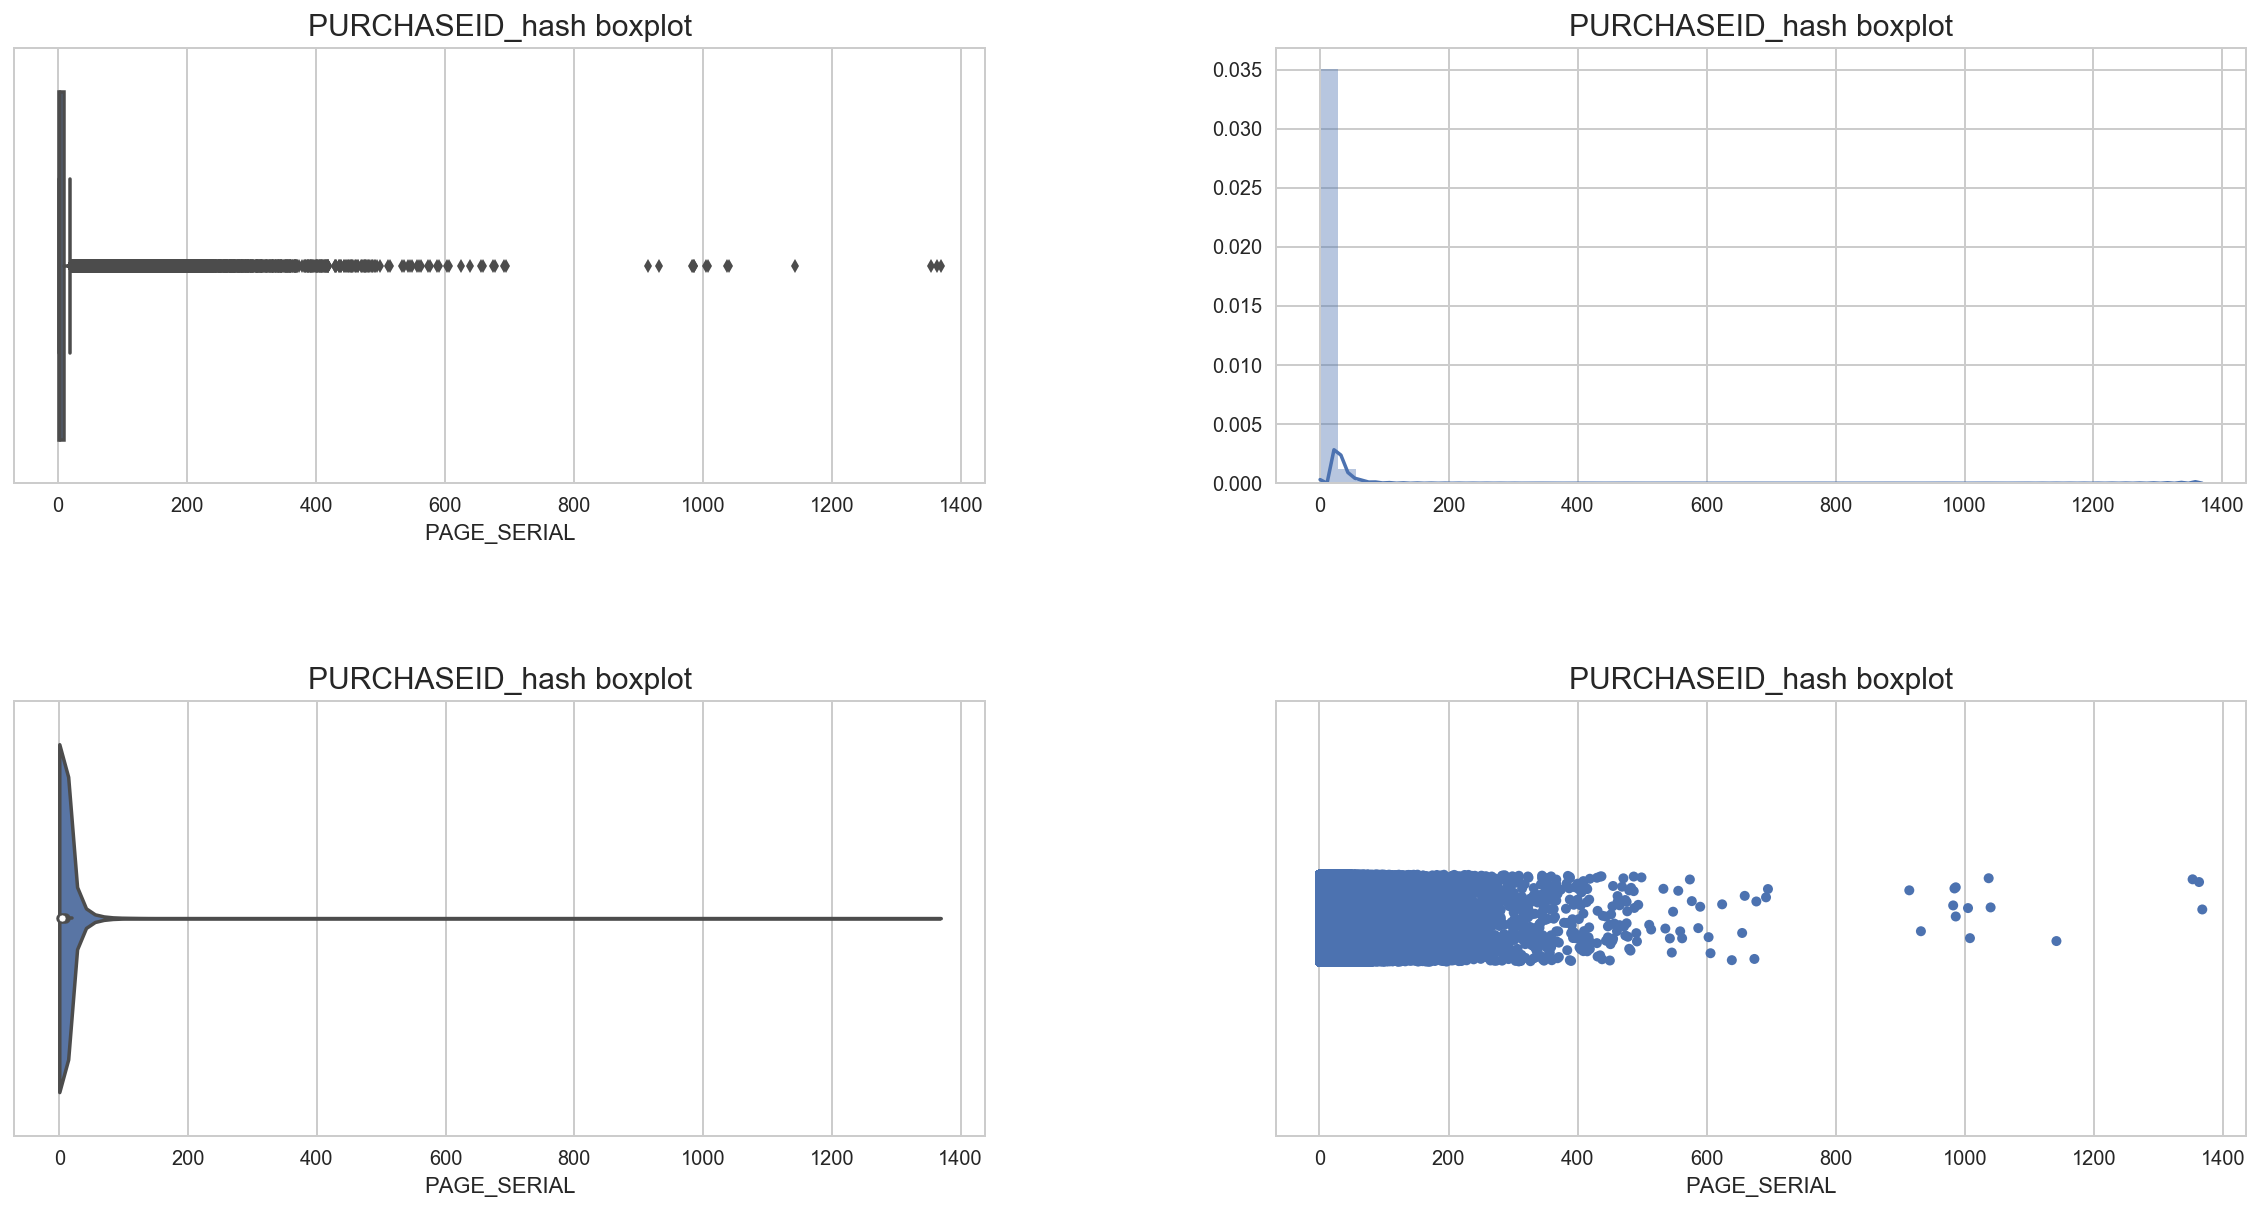

In [8]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# boxplot
plt.subplot(2,2,1)
sns.boxplot(x = 'PAGE_SERIAL', data = train)
plt.title("{} boxplot".format(train.columns[i]), fontsize = 15)

# distplot
plt.subplot(2,2,2)
sns.distplot(train['PAGE_SERIAL'].values)
plt.title("{} boxplot".format(train.columns[i]), fontsize = 15)

# violinplot
plt.subplot(2,2,3)
sns.violinplot(x = 'PAGE_SERIAL', data = train)
plt.title("{} boxplot".format(train.columns[i]), fontsize = 15)

# stripplot
plt.subplot(2,2,4)
sns.stripplot(x = 'PAGE_SERIAL', data = train, jitter = True)
plt.title("{} boxplot".format(train.columns[i]), fontsize = 15)

plt.show()

#### 2.2 Date

In [9]:
train['I_DATE'] = pd.to_datetime(train['I_DATE']) 
train['I_year'] = train['I_DATE'].dt.year 
train['I_month'] = train['I_DATE'].dt.month 
train['I_weekday'] = train['I_DATE'].dt.weekday # 요일 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
train['I_hour'] = train['I_DATE'].dt.hour

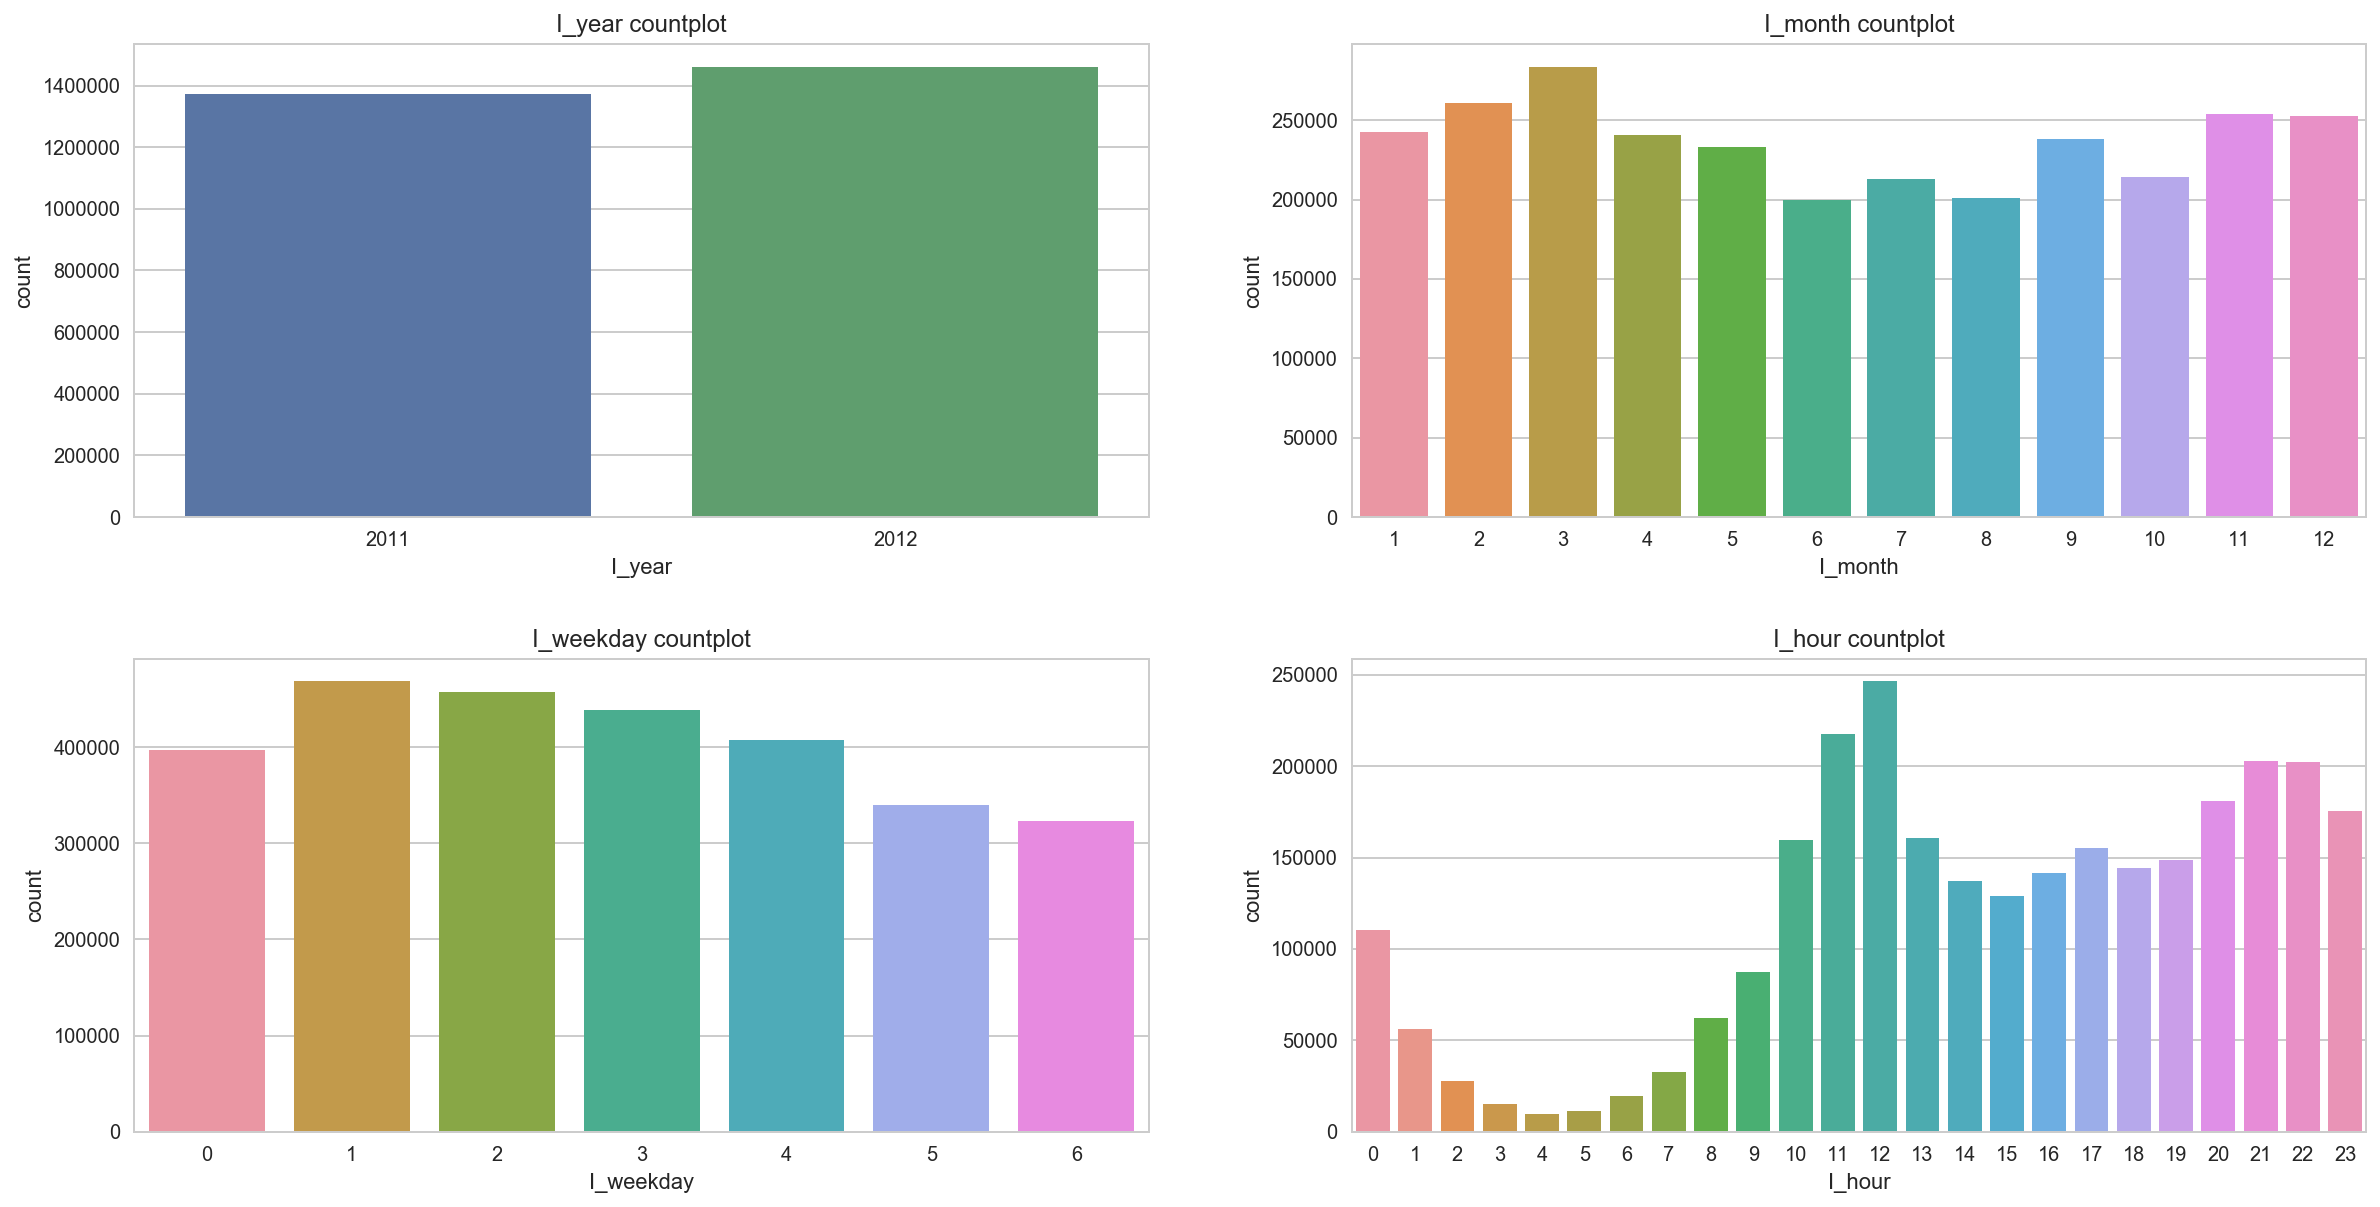

In [10]:
# feature countplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(8, 11+1):
    plt.subplot(2, 2, i-7)
    sns.countplot(x = train[train.columns[i]], data = train)
    plt.title('{} countplot'.format(train.columns[i]))

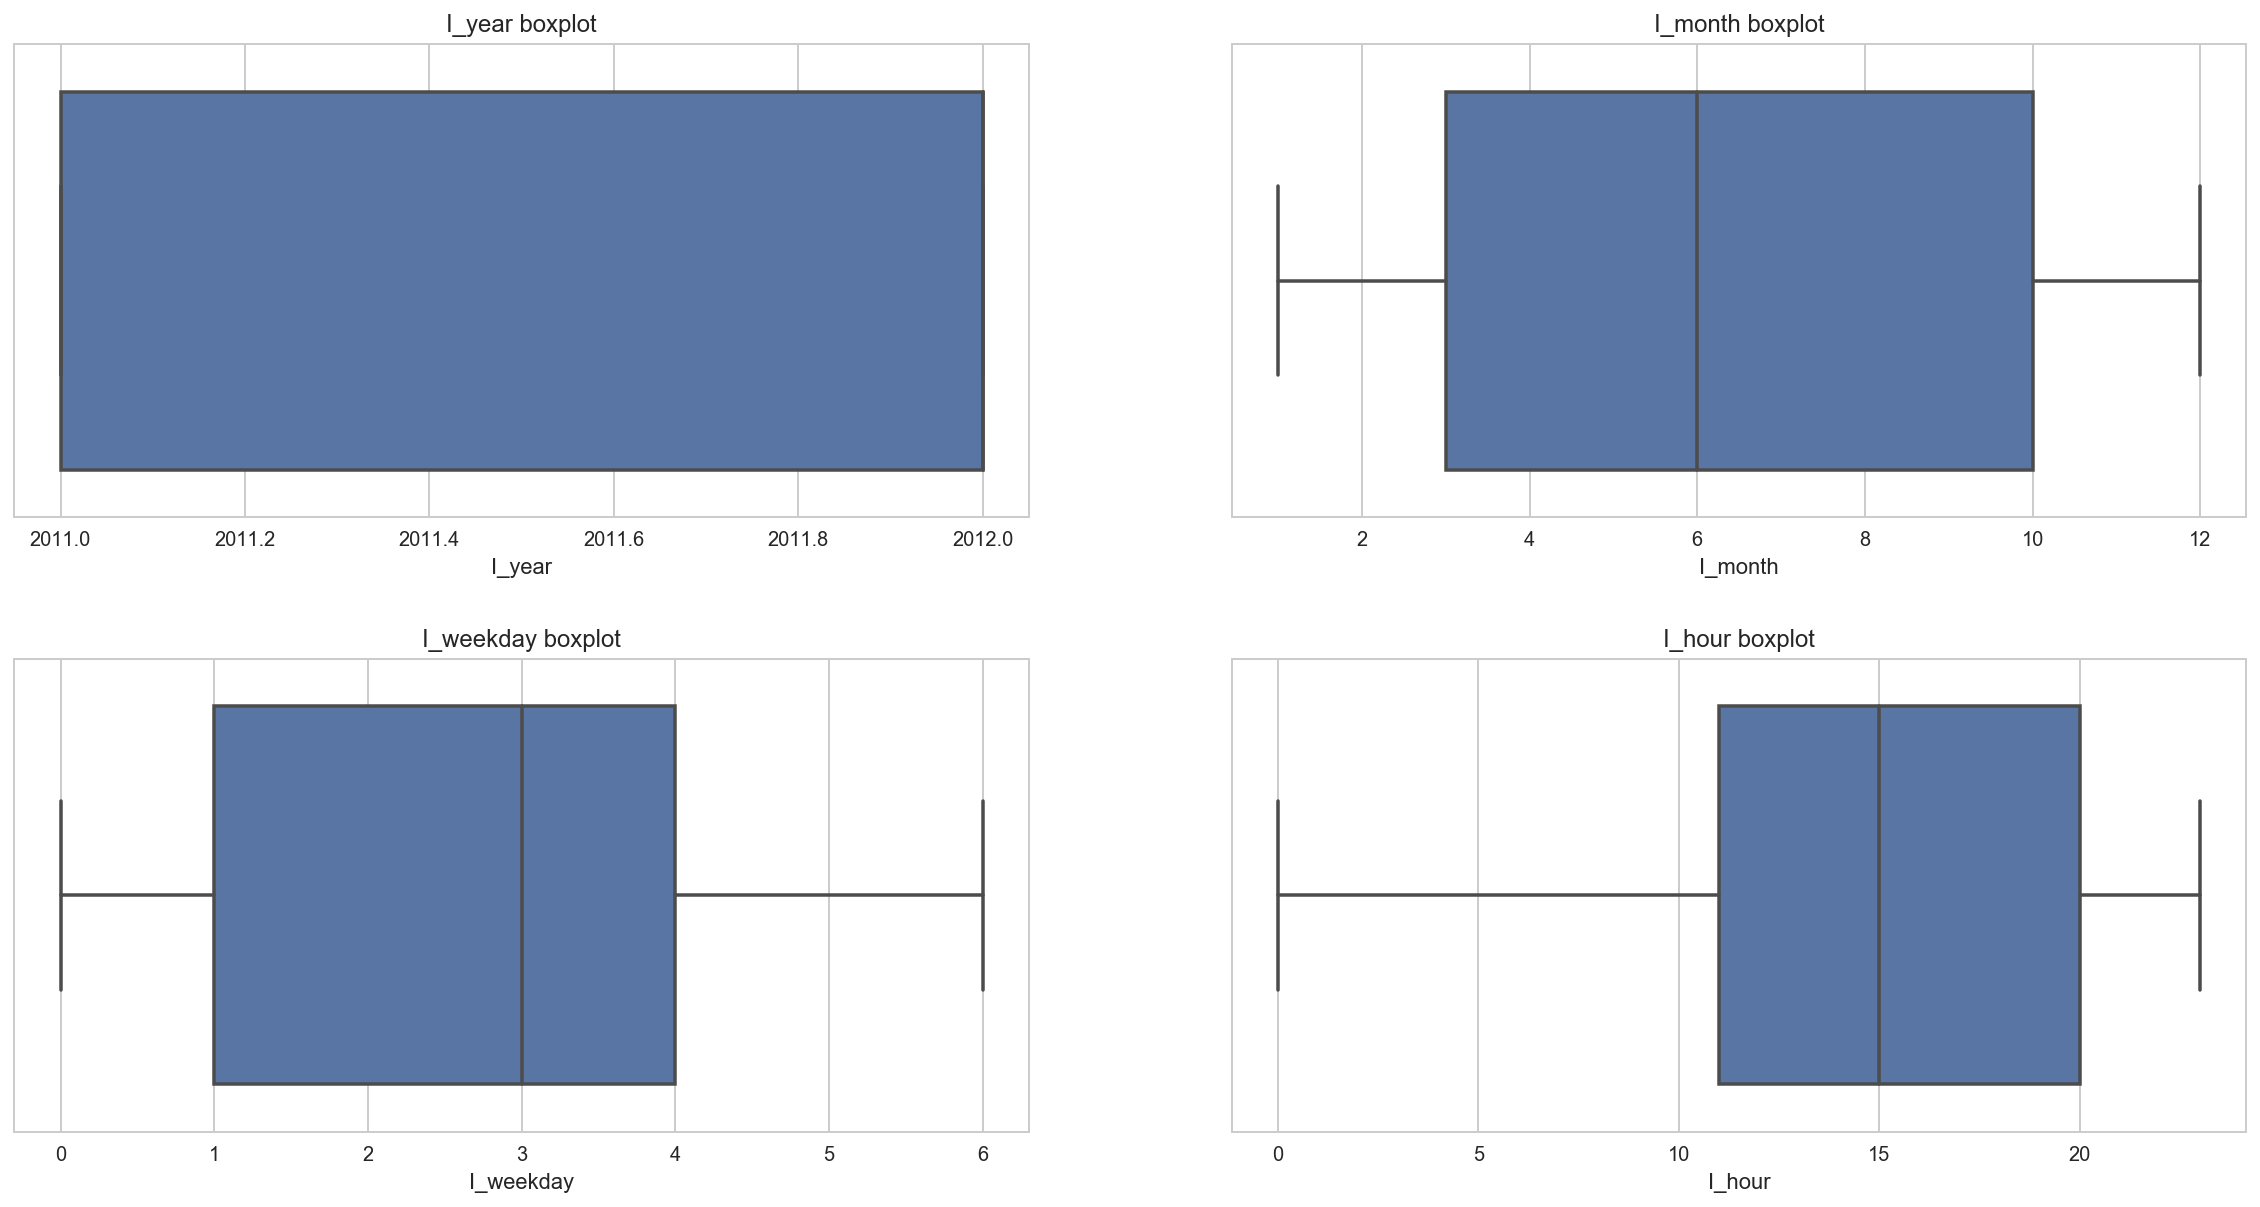

In [11]:
# feature boxplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(8, 11+1):
    plt.subplot(2, 2, i-7)
    sns.boxplot(x = train[train.columns[i]], data = train)
    plt.title('{} boxplot'.format(train.columns[i]))

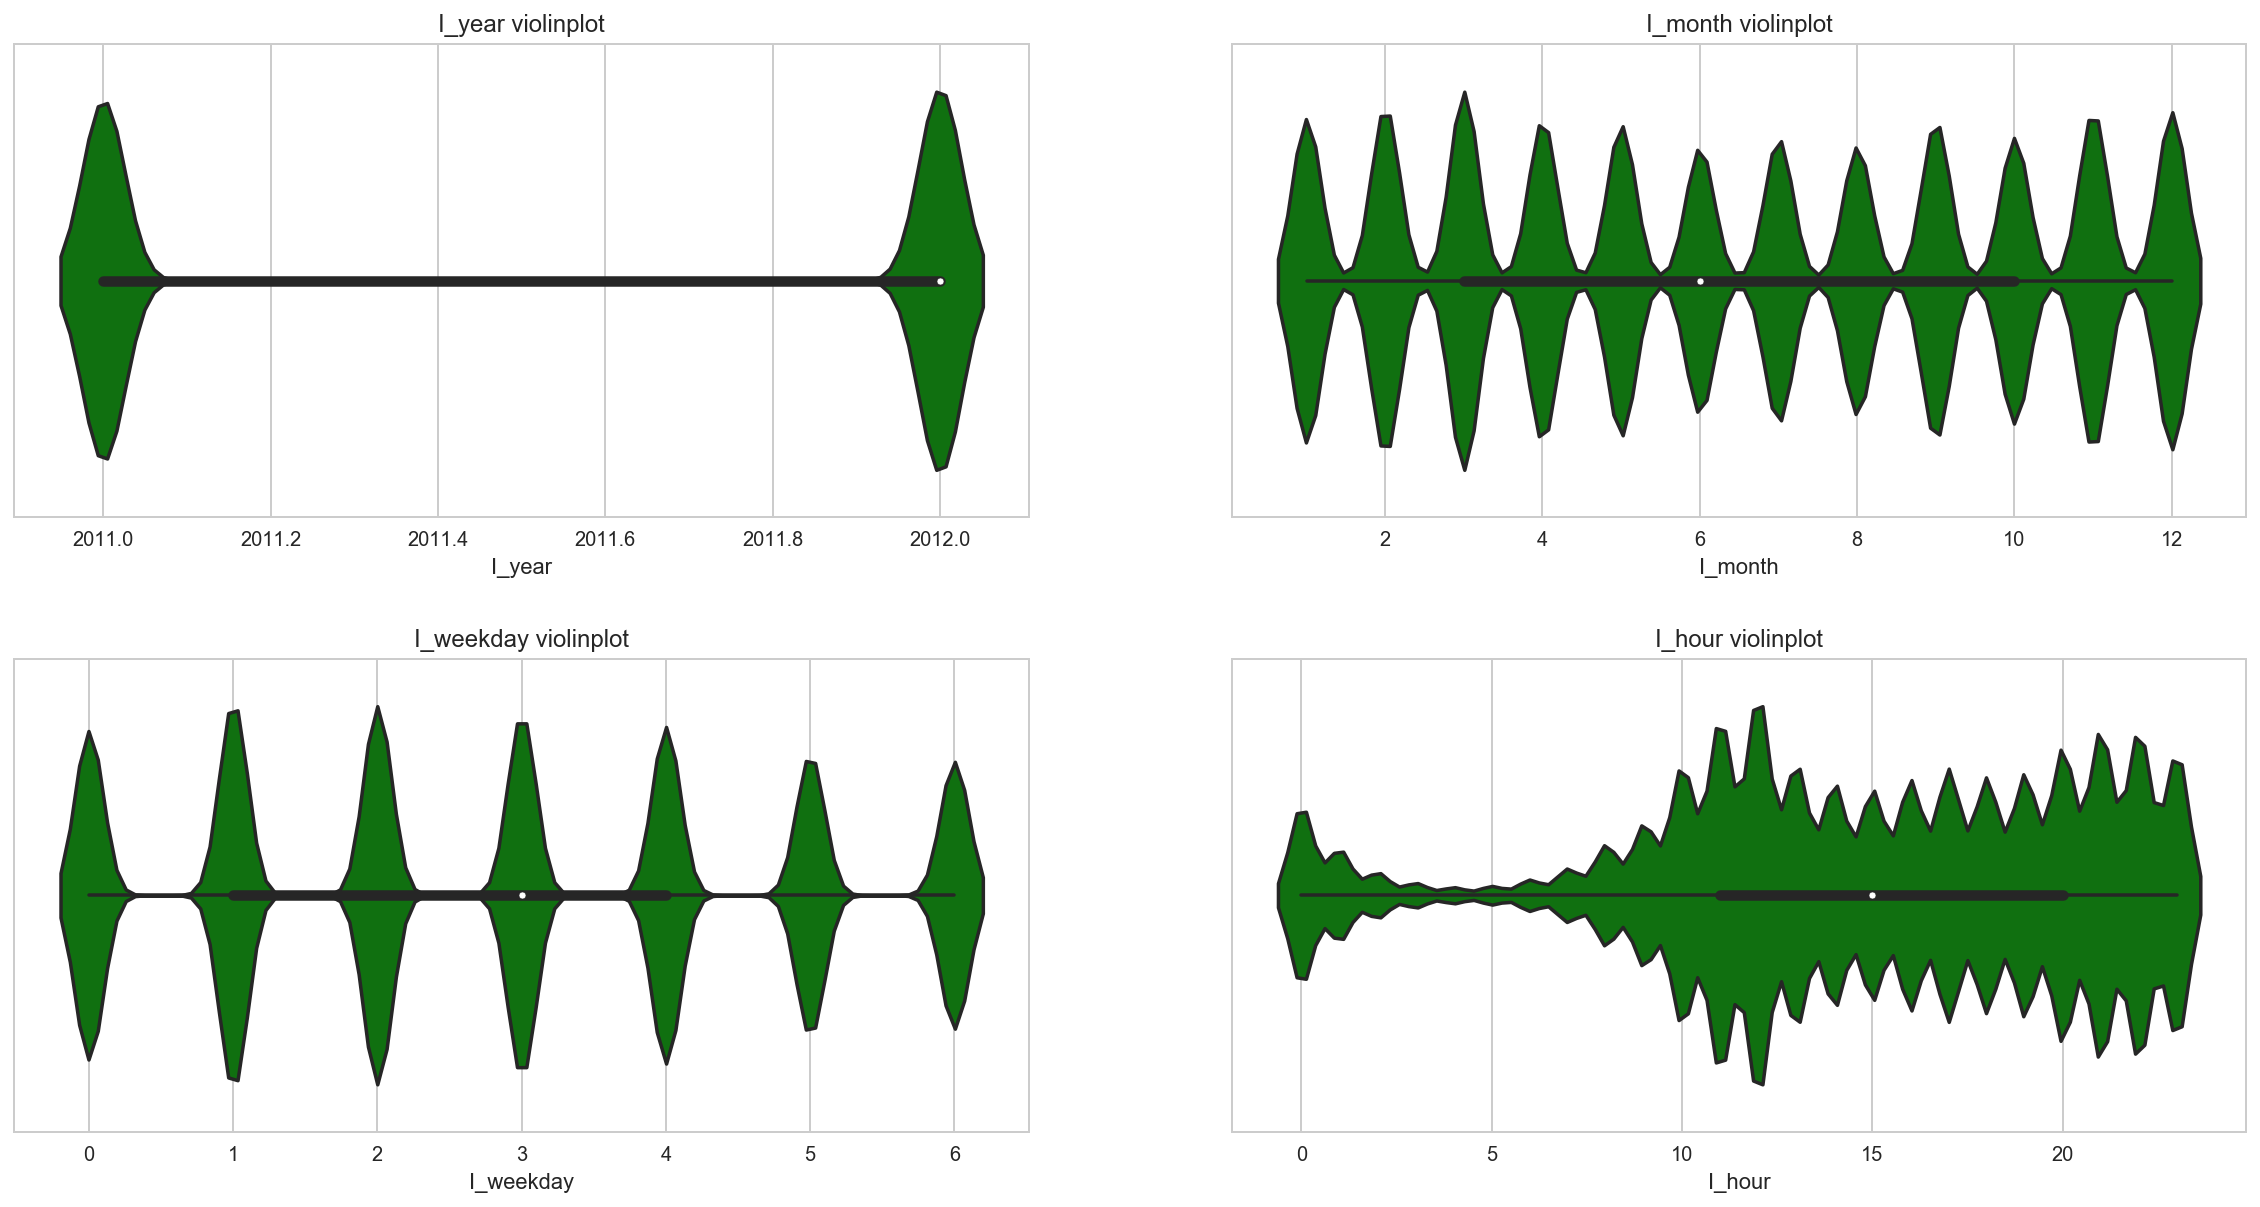

In [12]:
# feature violinplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(8, 11+1):
    plt.subplot(2, 2, i-7)
    sns.violinplot(x = train[train.columns[i]], color = 'green', data = train)
    plt.title('{} violinplot'.format(train.columns[i]))

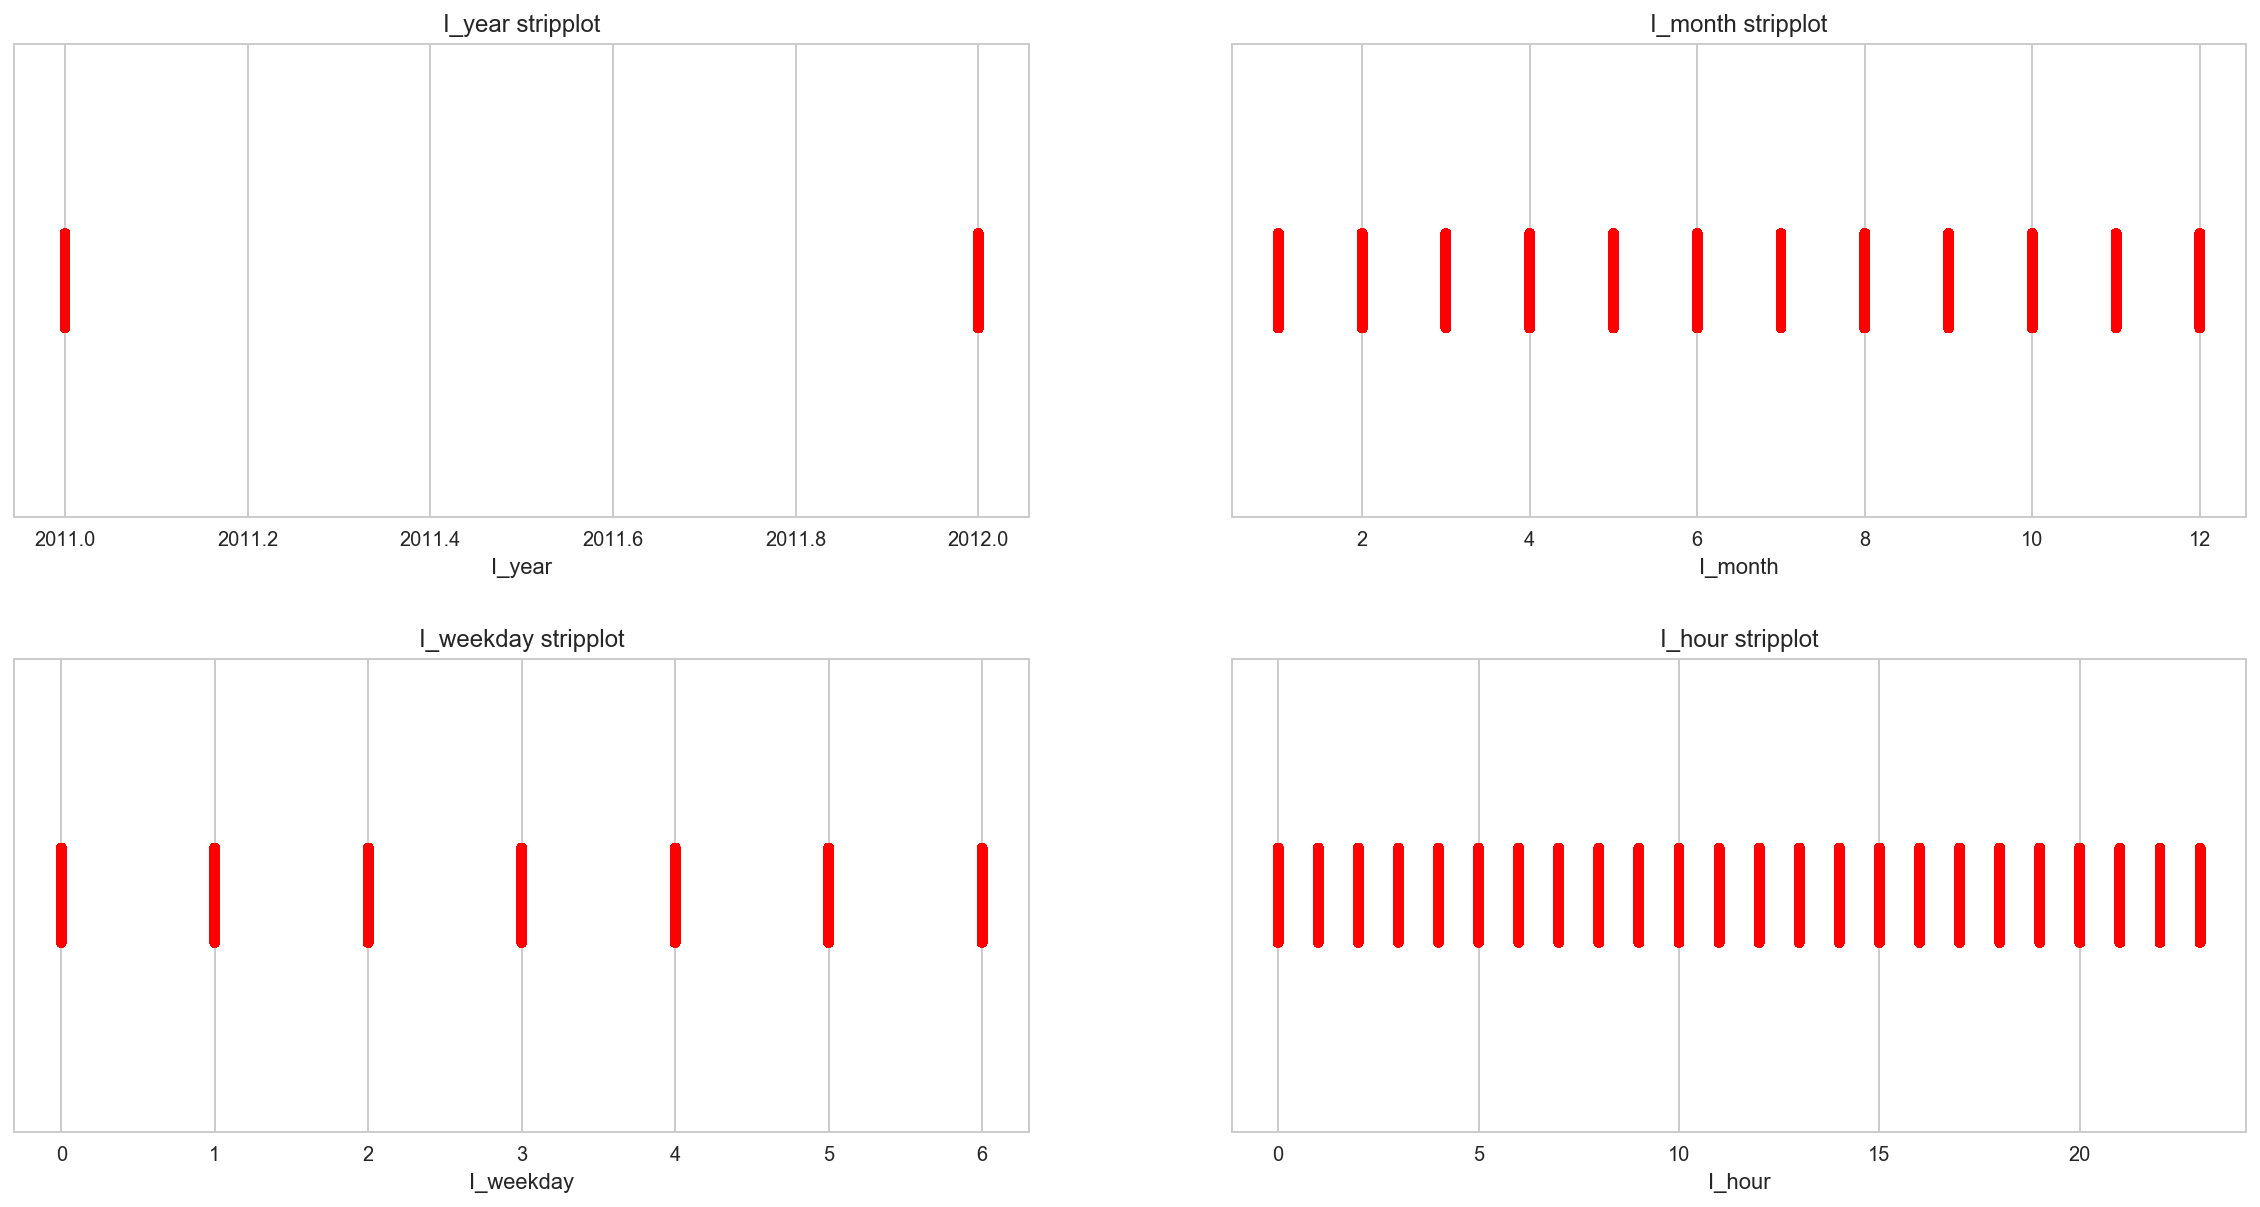

In [13]:
# feature stripplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(8, 11+1):
    plt.subplot(2, 2, i-7)
    sns.stripplot(x = train[train.columns[i]], data = train, color = 'red', jitter = True)
    plt.title('{} stripplot'.format(train.columns[i]))

In [14]:
train.tail()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash,I_year,I_month,I_weekday,I_hour
2833175,0,2011-08-20 12:13:21,4,ae75a8764951d2454273df8348dac8f3,8d91be4a8b5b02cf7117cb2b8e2d5a16,280f0cedda5c4b171ee6245889659571,f3261882332ac0d622d74ba067deb026,NaN,2011,8,5,12
2833176,0,2011-08-20 12:19:05,7,48243ea50a35bb107fafd46a461b0b28,0fc7873f2a0bd451b97e97bd6b792ba9,280f0cedda5c4b171ee6245889659571,f3261882332ac0d622d74ba067deb026,NaN,2011,8,5,12
2833177,0,2011-07-12 08:48:09,5,7d3892e54acb559ae36c459978489330,5cf5b9e5d600314a40a9fbac846ac15e,280f0cedda5c4b171ee6245889659571,cb624517ccc8fd90120bcfeb73d83758,NaN,2011,7,1,8
2833178,0,2011-07-12 08:50:03,8,7d3892e54acb559ae36c459978489330,5cf5b9e5d600314a40a9fbac846ac15e,280f0cedda5c4b171ee6245889659571,cb624517ccc8fd90120bcfeb73d83758,NaN,2011,7,1,8
2833179,0,2011-07-18 07:03:37,4,7d3892e54acb559ae36c459978489330,4ef82e25c2740e4ab55affbe5a003f50,280f0cedda5c4b171ee6245889659571,2a34fb9a7ea95bc5483d43a7295e5ee0,NaN,2011,7,0,7


In [15]:
train = train.drop(['I_DATE'], axis = 1)
train.tail()

,PURCHASE_FLG,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash,I_year,I_month,I_weekday,I_hour
2833175,0,4,ae75a8764951d2454273df8348dac8f3,8d91be4a8b5b02cf7117cb2b8e2d5a16,280f0cedda5c4b171ee6245889659571,f3261882332ac0d622d74ba067deb026,NaN,2011,8,5,12
2833176,0,7,48243ea50a35bb107fafd46a461b0b28,0fc7873f2a0bd451b97e97bd6b792ba9,280f0cedda5c4b171ee6245889659571,f3261882332ac0d622d74ba067deb026,NaN,2011,8,5,12
2833177,0,5,7d3892e54acb559ae36c459978489330,5cf5b9e5d600314a40a9fbac846ac15e,280f0cedda5c4b171ee6245889659571,cb624517ccc8fd90120bcfeb73d83758,NaN,2011,7,1,8
2833178,0,8,7d3892e54acb559ae36c459978489330,5cf5b9e5d600314a40a9fbac846ac15e,280f0cedda5c4b171ee6245889659571,cb624517ccc8fd90120bcfeb73d83758,NaN,2011,7,1,8
2833179,0,4,7d3892e54acb559ae36c459978489330,4ef82e25c2740e4ab55affbe5a003f50,280f0cedda5c4b171ee6245889659571,2a34fb9a7ea95bc5483d43a7295e5ee0,NaN,2011,7,0,7


In [16]:
train.to_csv('data/coupon_visit_train.csv', index = 0)